# 2. Importing Library

In [1]:
# First we will import the necessary Library 


import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import pickle

# 3. Loading Dataset

In [12]:
# Load our dataset 
# Note it should be in same dir


maindf=pd.read_csv('SOL-USD.csv')

In [13]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  1086
Total number of fields present in the dataset:  7


In [14]:
maindf.shape

(1086, 7)

In [15]:
maindf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-10,0.832005,1.313487,0.694187,0.951054,0.951054,87364276
1,2020-04-11,0.951054,1.049073,0.765020,0.776819,0.776819,43862444
2,2020-04-12,0.785448,0.956670,0.762426,0.882507,0.882507,38736897
3,2020-04-13,0.890760,0.891603,0.773976,0.777832,0.777832,18211285
4,2020-04-14,0.777832,0.796472,0.628169,0.661925,0.661925,16747614


In [16]:
maindf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1081,2023-03-27,20.976086,20.979824,19.508055,19.921675,19.921675,359607077
1082,2023-03-28,19.922195,20.764208,19.665567,20.470697,20.470697,347656506
1083,2023-03-29,20.465441,21.505144,20.458122,21.111467,21.111467,378726667
1084,2023-03-30,21.113840,21.590513,20.232969,20.551046,20.551046,472449267
1085,2023-03-31,20.562157,20.978617,20.165987,20.740515,20.740515,325977984


In [17]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1086 non-null   object 
 1   Open       1086 non-null   float64
 2   High       1086 non-null   float64
 3   Low        1086 non-null   float64
 4   Close      1086 non-null   float64
 5   Adj Close  1086 non-null   float64
 6   Volume     1086 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 59.5+ KB


In [18]:
maindf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1.086000e+03
mean,48.565057,50.867588,46.217454,48.558593,48.558593,1.088405e+09
std,59.033326,61.540506,56.244718,58.966136,58.966136,1.437768e+09
min,0.513391,0.559759,0.505194,0.515273,0.515273,6.520200e+05
25%,3.509342,3.790760,3.255431,3.517171,3.517171,4.417681e+07
50%,28.948850,31.077336,27.437686,28.970038,28.970038,6.114537e+08
75%,53.627292,58.236711,49.808874,53.720484,53.720484,1.597925e+09
max,258.781555,260.062103,246.122421,258.934326,258.934326,1.706864e+10


# Checking for Null Values

In [19]:
print('Null Values:',maindf.isnull().values.sum())

Null Values: 0


In [20]:
print('NA values:',maindf.isnull().values.any())

NA values: False


In [21]:
# Final shape of the dataset after dealing with null values 

maindf.shape

(1086, 7)

In [22]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_overall = maindf.loc[(maindf['Date'] >= '2014-09-17')
                     & (maindf['Date'] <= '2023-03-30')]

y_overall.drop(y_overall[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2020-04-10,0.832005,1.313487,0.694187,0.951054
1,2020-04-11,0.951054,1.049073,0.765020,0.776819
2,2020-04-12,0.785448,0.956670,0.762426,0.882507
3,2020-04-13,0.890760,0.891603,0.773976,0.777832
4,2020-04-14,0.777832,0.796472,0.628169,0.661925
...,...,...,...,...,...
1080,2023-03-26,20.444178,21.129982,20.345690,20.975519
1081,2023-03-27,20.976086,20.979824,19.508055,19.921675
1082,2023-03-28,19.922195,20.764208,19.665567,20.470697
1083,2023-03-29,20.465441,21.505144,20.458122,21.111467


In [23]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,51.653221,51.065934
February,43.836599,43.917477
March,42.838698,43.149983
April,51.867547,51.689092
May,33.822525,33.280615
June,24.321987,24.206033
July,23.212692,23.330505
August,33.373355,34.081971
September,62.269675,62.426755


In [24]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'], 
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [25]:
# Lets First Take all the Close Price 
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (1086, 2)


In [26]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2014-2023', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Now we will Take data of just 5 Year

In [27]:
closedf = closedf[closedf['Date'] > '2021-11-01']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  515


In [28]:
closedf

,Date,Close
571,2021-11-02,220.239594
572,2021-11-03,242.898819
573,2021-11-04,247.387772
574,2021-11-05,236.474335
575,2021-11-06,258.934326
...,...,...
1081,2023-03-27,19.921675
1082,2023-03-28,20.470697
1083,2023-03-29,21.111467
1084,2023-03-30,20.551046


In [29]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [30]:
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(515, 1)


* ### Slicing data into Training set and Testing set

In [31]:
# we keep the training set as 60% and 40% testing set

training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (309, 1)
test_data:  (206, 1)


In [32]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [33]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (293, 15)
y_train:  (293,)
X_test:  (190, 15)
y_test (190,)


In [34]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (293, 15, 1)
X_test:  (190, 15, 1)


* # Actuall Model Building

In [35]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [36]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
10/10 [==============================] - 2s 44ms/step - loss: 0.0758 - val_loss: 4.9469e-04
Epoch 2/200
10/10 [==============================] - 0s 7ms/step - loss: 0.0440 - val_loss: 0.0013
Epoch 3/200
10/10 [==============================] - 0s 7ms/step - loss: 0.0193 - val_loss: 0.0045
Epoch 4/200
10/10 [==============================] - 0s 7ms/step - loss: 0.0053 - val_loss: 0.0086
Epoch 5/200
10/10 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0078
Epoch 6/200
10/10 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0049
Epoch 7/200
10/10 [==============================] - 0s 7ms/step - loss: 0.0031 - val_loss: 0.0033
Epoch 8/200
10/10 [==============================] - 0s 7ms/step - loss: 0.0027 - val_loss: 0.0024
Epoch 9/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0025 - val_loss: 0.0016
Epoch 10/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0023 - val_loss: 0.0018
Epoc

- ### Plotting Loss vs Validation loss 

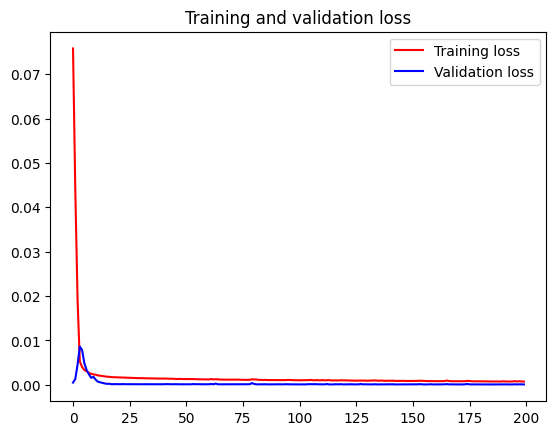

<Figure size 640x480 with 0 Axes>

In [37]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [38]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

6/6 [==============================] - 0s 2ms/step


((293, 1), (190, 1))

- # Model Evaluation

In [39]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

- ## Evaluation metrices RMSE, MSE and MAE

In [40]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  6.6917252355658
Train data MSE:  44.77918662830816
Train data MAE:  4.687390565953798
-------------------------------------------------------------------------------------
Test data RMSE:  2.1442361623007673
Test data MSE:  4.597748719718322
Test data MAE:  1.46078247203594


- ## Variance Regression Score

In [41]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9855029633789123
Test data explained variance regression score: 0.9140944877324116


- ## R square score for regression

In [42]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9853533774051898
Test data R2 score: 0.9131724226849051


- ## Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [43]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.005031914384501113
Test data MGD:  0.014348067833222199
----------------------------------------------------------------------
Train data MPD:  0.40359192142855677
Test data MPD:  0.23854590986113464


In [44]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (515, 1)
Test predicted data:  (515, 1)


- # Predicting next 30 days

In [45]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 7
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  7


- # Plotting last 15 days of dataset and next predicted 30 days

In [46]:
print(lst_output[2])
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[0.042736250907182693]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22]


In [47]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()
fbitfile= open("sol.txt", "wb")
pickle.dump((next_predicted_days_value),fbitfile)
fbitfile.close()


- # Plotting entire Closing Stock Price with next 30 days period of prediction

In [48]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()